<a href="https://colab.research.google.com/github/Zkeera/machine-learning-dasar/blob/main/%5BClustering%5D_Submission_Akhir_BMLP_Mohammad_Taqi_Ashiddiqi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

In [59]:
url='https://raw.githubusercontent.com/Zkeera/machine-learning-dasar/refs/heads/main/dataset/bank_transactions_data_edited.csv'
df = pd.read_csv(url)

In [60]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [62]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [63]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)

In [64]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [65]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [66]:
df.isnull().sum()

,0
TransactionID,29
AccountID,21
TransactionAmount,26
TransactionDate,28
TransactionType,30
Location,30
DeviceID,30
IP Address,20
MerchantID,23
Channel,27


In [67]:
df.duplicated().sum()

np.int64(21)

In [68]:
numerical_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

In [69]:
categorical_columns = ['TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [70]:
features = df[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']]
scaler = MinMaxScaler()  # Inisialisasi MinMaxScaler
scaled_features = scaler.fit_transform(features)  # Scaling fitur

In [71]:
df = df.drop(columns=['TransactionID', 'AccountID', 'IP Address', 'DeviceID', 'MerchantID'])

In [72]:
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
print(scaled_df.head())

   TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
0           0.007207     0.838710             0.244828        0.336832
1           0.195940     0.806452             0.451724        0.918055
2           0.065680     0.016129             0.158621        0.068637
3           0.096016     0.129032             0.051724        0.569198
4           0.006874     0.435484             0.648276        0.492591


In [73]:
label_encoder = LabelEncoder()

In [74]:
df['TransactionType'] = label_encoder.fit_transform(df['TransactionType'])
df['Location'] = label_encoder.fit_transform(df['Location'])
df['Channel'] = label_encoder.fit_transform(df['Channel'])
df['CustomerOccupation'] = label_encoder.fit_transform(df['CustomerOccupation'])

In [75]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,0,1,2,45.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39


In [76]:
df.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [77]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).

In [78]:
# Menghapus data duplikat menggunakan drop_duplicates().

(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [79]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.

In [80]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [81]:
df.describe()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
count,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000,2537.000000
mean,296.772073,0.777296,20.964525,0.988175,44.680725,1.521876,119.346866,1.120615,5109.401127
std,290.858415,0.416143,12.196453,0.804572,17.773964,1.133626,69.722362,0.592105,3877.365521
min,0.260000,0.000000,0.000000,0.000000,18.000000,0.000000,10.000000,1.000000,101.250000
25%,83.070000,1.000000,11.000000,0.000000,27.000000,1.000000,63.000000,1.000000,1519.350000
50%,211.360000,1.000000,21.000000,1.000000,45.000000,2.000000,112.000000,1.000000,4734.110000
75%,409.610000,1.000000,31.000000,2.000000,59.000000,3.000000,161.000000,1.000000,7627.040000
max,1919.110000,1.000000,42.000000,2.000000,80.000000,3.000000,300.000000,5.000000,14977.990000


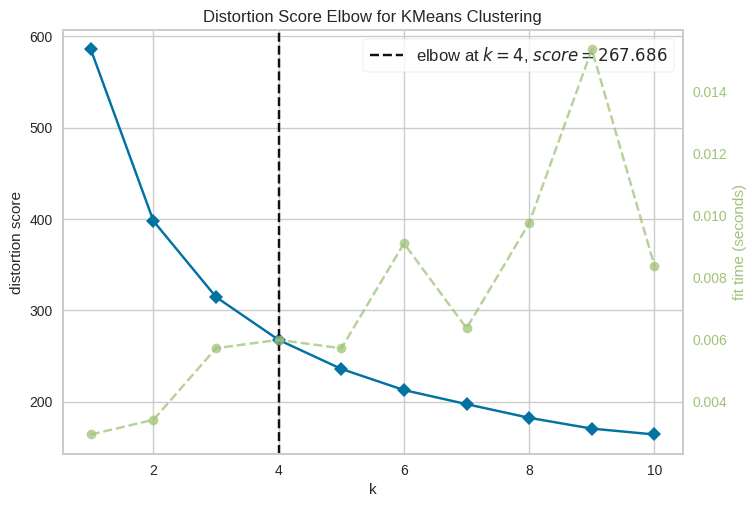

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [82]:
kmeans = KMeans(random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1, 11))
visualizer.fit(scaled_features)
visualizer.show()

In [83]:
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [84]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Cluster
0,14.09,2023-04-11 16:29:14,1,36,0,70.0,0,81.0,1.0,5112.21,2024-11-04 08:08:08,2
1,376.24,2023-06-27 16:44:19,1,15,0,68.0,0,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,126.29,2023-07-10 18:16:08,1,23,2,19.0,3,56.0,1.0,1122.35,2024-11-04 08:07:04,0
3,184.50,2023-05-05 16:32:11,1,33,2,26.0,3,25.0,1.0,8569.06,2024-11-04 08:09:06,3
4,13.45,2023-10-16 17:51:24,0,1,2,45.0,3,198.0,1.0,7429.40,2024-11-04 08:06:39,1


Jalankan cell code ini untuk menyimpan model kamu.

In [85]:
joblib.dump(kmeans, "model_clustering.h5")

['model_clustering.h5']

(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [86]:
# Menghitung dan menampilkan nilai Silhouette Score.

In [87]:
# Membuat visualisasi hasil clustering

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [88]:
# Membangun model menggunakan PCA.

In [89]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")

# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [90]:
df['Cluster'] = kmeans.labels_

In [91]:
cluster_summary = df.groupby('Cluster')[['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance']].mean()
print(cluster_summary)

         TransactionAmount  CustomerAge  TransactionDuration  AccountBalance
Cluster                                                                     
0               305.424866    25.390805           110.730524     1581.727420
1               274.840692    49.158974           226.205128     6166.438667
2               299.038651    62.451362            93.945525     4384.757782
3               296.823626    44.101180            93.472175    10014.331804


In [92]:
cluster_counts = df['Cluster'].value_counts()
print("\nJumlah Anggota Tiap Cluster:")
print(cluster_counts)


Jumlah Anggota Tiap Cluster:
Cluster
0    783
2    771
3    593
1    390
Name: count, dtype: int64


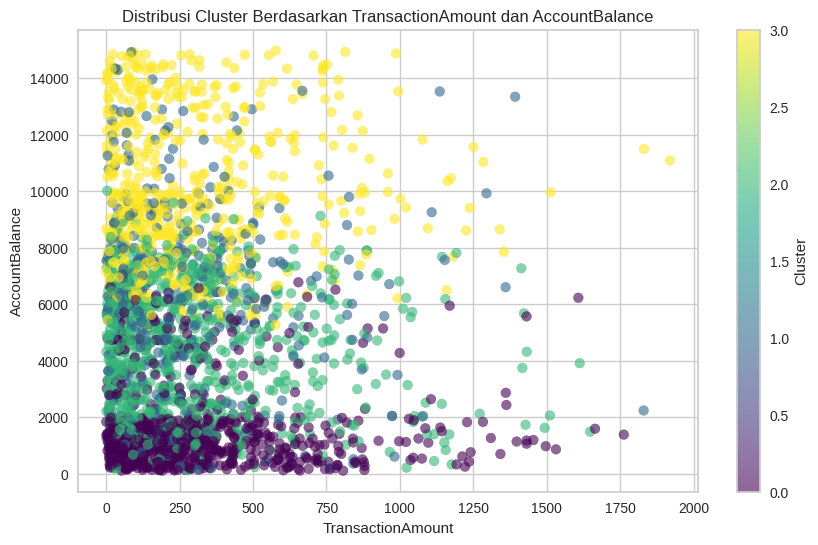

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter(df['TransactionAmount'], df['AccountBalance'], c=df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('Distribusi Cluster Berdasarkan TransactionAmount dan AccountBalance')
plt.xlabel('TransactionAmount')
plt.ylabel('AccountBalance')
plt.colorbar(label='Cluster')
plt.show()

In [94]:
numerical_stats = df.describe().transpose()

In [95]:
numerical_stats['mode'] = df.mode().iloc[0]

In [96]:
print("Analisis Deskriptif untuk Fitur Numerik:")
print(numerical_stats[['mean', 'min', 'max', 'mode']])

Analisis Deskriptif untuk Fitur Numerik:
                            mean     min       max     mode
TransactionAmount     296.772073    0.26   1919.11   211.36
TransactionType         0.777296    0.00      1.00      1.0
Location               20.964525    0.00     42.00     13.0
Channel                 0.988175    0.00      2.00      1.0
CustomerAge            44.680725   18.00     80.00     27.0
CustomerOccupation      1.521876    0.00      3.00      3.0
TransactionDuration   119.346866   10.00    300.00    112.0
LoginAttempts           1.120615    1.00      5.00      1.0
AccountBalance       5109.401127  101.25  14977.99  4734.11
Cluster                 1.462751    0.00      3.00      0.0


In [97]:
categorical_stats = df['TransactionAmount'].describe()
print("Analisis Deskriptif untuk Fitur Kategorikal:")
print(categorical_stats)

Analisis Deskriptif untuk Fitur Kategorikal:
count    2537.000000
mean      296.772073
std       290.858415
min         0.260000
25%        83.070000
50%       211.360000
75%       409.610000
max      1919.110000
Name: TransactionAmount, dtype: float64


In [98]:
numerical_features = df.select_dtypes(include=['number'])
numerical_stats['median'] = numerical_features.median()

In [99]:
numerical_stats['variance'] = numerical_features.var()
numerical_stats['skewness'] = numerical_features.skew()

In [100]:
print("Agregasi Tambahan untuk Fitur Numerik:")
print(numerical_stats[['mean', 'min', 'max', 'mode', 'median', 'variance', 'skewness']])

Agregasi Tambahan untuk Fitur Numerik:
                            mean     min       max     mode   median  \
TransactionAmount     296.772073    0.26   1919.11   211.36   211.36   
TransactionType         0.777296    0.00      1.00      1.0     1.00   
Location               20.964525    0.00     42.00     13.0    21.00   
Channel                 0.988175    0.00      2.00      1.0     1.00   
CustomerAge            44.680725   18.00     80.00     27.0    45.00   
CustomerOccupation      1.521876    0.00      3.00      3.0     2.00   
TransactionDuration   119.346866   10.00    300.00    112.0   112.00   
LoginAttempts           1.120615    1.00      5.00      1.0     1.00   
AccountBalance       5109.401127  101.25  14977.99  4734.11  4734.11   
Cluster                 1.462751    0.00      3.00      0.0     2.00   

                         variance  skewness  
TransactionAmount    8.459862e+04  1.752656  
TransactionType      1.731752e-01 -1.333747  
Location             1.487535e

In [101]:
# Analisis statistik berdasarkan cluster
cluster_stats = df.groupby('Cluster').describe()

# Menampilkan statistik agregat berdasarkan cluster
print("Statistik Agregat Berdasarkan Cluster:")

# Mengakses statistik 'mean', 'min', dan 'max' dari level kedua dari multi-indeks
cluster_summary = cluster_stats.stack(level=0)[['mean', 'min', 'max']]

# Menampilkan hasil
print(cluster_summary)

Statistik Agregat Berdasarkan Cluster:
                                     mean      min       max
Cluster                                                     
0       AccountBalance        1581.727420   101.25   7047.04
        Channel                  0.980843     0.00      2.00
        CustomerAge             25.390805    18.00     47.00
        CustomerOccupation       2.522350     0.00      3.00
        Location                21.172414     0.00     42.00
        LoginAttempts            1.127714     1.00      5.00
        TransactionAmount      305.424866     0.26   1762.28
        TransactionDuration    110.730524    10.00    299.00
        TransactionType          0.791826     0.00      1.00
1       AccountBalance        6166.438667   135.96  14928.35
        Channel                  1.007692     0.00      2.00
        CustomerAge             49.158974    18.00     80.00
        CustomerOccupation       1.105128     0.00      3.00
        Location                20.333333     

<ipython-input-101-834a7527badd>:8: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  cluster_summary = cluster_stats.stack(level=0)[['mean', 'min', 'max']]


###Cluster 0: (Nasabah Bertransaksi dan Pendapatan Menengah)
- Rata-rata (mean) AccountBalance: 1581.73

- Rata-rata (mean) TransactionAmount: 305.42

- Rata-rata (mean) CustomerAge: 25.39

- Rata-rata (mean) TransactionDuration: 110.73

## Analisis:
Cluster ini mencakup nasabah dengan saldo akun yang relatif rendah dan transaksi yang juga lebih kecil dibandingkan cluster lainnya. Umumnya, nasabah dalam cluster ini berusia lebih muda dan cenderung melakukan transaksi dengan durasi yang tidak terlalu lama. Cluster ini bisa mencakup nasabah yang masih dalam tahap awal pengelolaan keuangan, sehingga rekomendasi yang dapat diberikan adalah menawarkan produk perbankan yang terjangkau dan edukasi keuangan dasar.

## Cluster 1: (Nasabah Berpendapatan Tinggi dan Pengeluaran Moderat)
- Rata-rata (mean) AccountBalance: 6166.44

- Rata-rata (mean) TransactionAmount: 274.84

- Rata-rata (mean) CustomerAge: 49.16

- Rata-rata (mean) TransactionDuration: 226.21

## Analisis:
Cluster ini mencakup nasabah dengan saldo akun yang tinggi dan pengeluaran transaksi yang lebih moderat. Nasabah dalam cluster ini umumnya lebih tua dan lebih stabil secara finansial. Mereka memiliki kemampuan untuk melakukan transaksi yang lebih besar, namun pengeluaran mereka tidak terlalu tinggi. Rekomendasi untuk cluster ini adalah menawarkan produk investasi yang lebih canggih atau program loyalitas yang dapat memaksimalkan potensi pendapatan mereka.

## Cluster 2: (Nasabah Senior dengan Pengeluaran dan Pendapatan Menengah)
- Rata-rata (mean) AccountBalance: 4384.76

- Rata-rata (mean) TransactionAmount: 299.04

- Rata-rata (mean) CustomerAge: 62.45

- Rata-rata (mean) TransactionDuration: 93.95

## Analisis:
Cluster ini mencakup nasabah yang lebih tua, dengan saldo akun dan transaksi yang lebih tinggi dibandingkan cluster pertama. Nasabah di sini memiliki pengalaman lebih banyak dalam bertransaksi, namun lebih berhati-hati dalam pengeluarannya, terbukti dengan transaksi yang lebih singkat. Rekomendasi untuk cluster ini adalah menawarkan produk-produk pensiun atau tabungan yang memberikan keamanan finansial jangka panjang.

## Cluster 3: (Nasabah Elite dengan Pendapatan dan Pengeluaran Tinggi)
- Rata-rata (mean) AccountBalance: 10014.33

- Rata-rata (mean) TransactionAmount: 296.82

- Rata-rata (mean) CustomerAge: 44.10

- Rata-rata (mean) TransactionDuration: 93.47

## Analisis:
Cluster ini mencakup nasabah dengan saldo akun yang sangat tinggi dan tingkat transaksi yang cukup besar. Mereka berusia antara 18 hingga 70 tahun dan umumnya memiliki penghasilan yang lebih tinggi. Cluster ini menggambarkan nasabah dengan daya beli yang sangat baik, dan mereka lebih sering bertransaksi. Rekomendasi untuk cluster ini adalah menawarkan produk premium, termasuk investasi jangka panjang, asuransi, atau layanan perbankan eksklusif.

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [102]:
df.rename(columns={'Cluster': 'Target'}, inplace=True)

In [103]:
df.to_csv('data_clustering.csv', index=False)
from google.colab import files
df.to_csv('data_clustering.csv', index=False)
files.download('data_clustering.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [104]:
# inverse dataset ke rentang normal untuk numerikal
# inverse dataset yang sudah diencode ke kategori aslinya.

In [105]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal menggunakan data yang sudah diinverse.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [106]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [107]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)